# Load Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [15]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


### Normalizing the images

In [16]:
# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Shape of the data

In [6]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)
print("x_test data type:", x_test.dtype)
print("y_test data type:", y_test.dtype)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
x_train data type: float32
y_train data type: uint8
x_test data type: float32
y_test data type: uint8


CIFAR-10 dataset, the shape of the x_train and x_test arrays is (50000, 32, 32, 3), which means that each image in the dataset is 32 pixels wide, 32 pixels tall, and has 3 color channels (RGB).

## Random Image

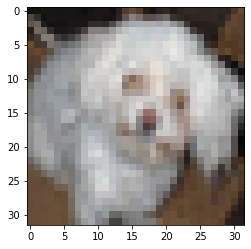

In [7]:
plt.imshow(x_test[1000])

### visualizing the image to verify the data

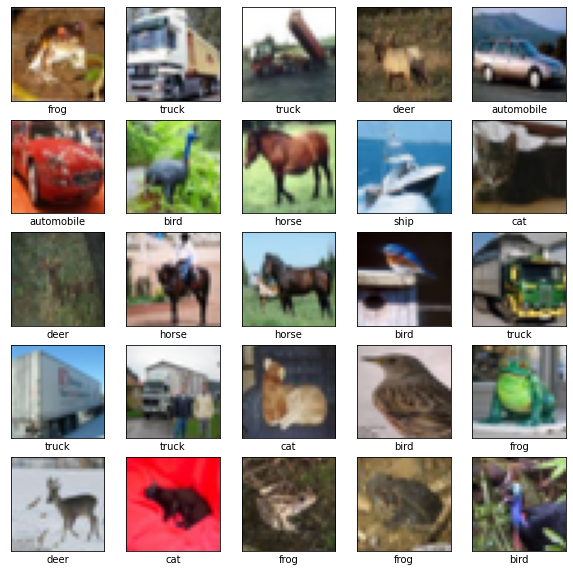

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Building a Convolutional Neural Network

In [17]:
model = keras.Sequential(
    [
        keras.Input(shape=[32,32,3]),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(units = 128, activation="softmax"),
    ]
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

## Compile the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Train the model

In [20]:
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1)

Epoch 1/15
704/704 [==============================] - 41s 57ms/step - loss: 1.8594 - accuracy: 0.4595 - val_loss: 1.3228 - val_accuracy: 0.5308
Epoch 2/15
704/704 [==============================] - 46s 65ms/step - loss: 1.2299 - accuracy: 0.5813 - val_loss: 1.1536 - val_accuracy: 0.5970
Epoch 3/15
704/704 [==============================] - 45s 64ms/step - loss: 1.0843 - accuracy: 0.6233 - val_loss: 1.0837 - val_accuracy: 0.6224
Epoch 4/15
704/704 [==============================] - 44s 62ms/step - loss: 1.0059 - accuracy: 0.6484 - val_loss: 1.0575 - val_accuracy: 0.6238
Epoch 5/15
704/704 [==============================] - 44s 62ms/step - loss: 0.9567 - accuracy: 0.6674 - val_loss: 1.0676 - val_accuracy: 0.6224
Epoch 6/15
704/704 [==============================] - 43s 61ms/step - loss: 0.9231 - accuracy: 0.6818 - val_loss: 1.3738 - val_accuracy: 0.5804
Epoch 7/15
704/704 [==============================] - 43s 62ms/step - loss: 0.8933 - accuracy: 0.6906 - val_loss: 0.9111 - val_accuracy:

## Evaluate the model on the test set

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.8391 - accuracy: 0.7044
Test accuracy: 0.7044000029563904
Test loss: 0.8390955328941345
